In [ ]:
import pandas as pd
import re

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/동아리_스터디_대외활동/Solux/2학기/Solux_Honey_News/crawling/result_crawling/news_data.csv')
data

,Unnamed: 0,title,article,news
0,0,윤 대통령 “북 무인기 한 대 왔으면 우린 2~3대 보내라”,"윤석열 대통령이 28일 “북한의 어떤 도발에도 확실하게 응징, 보복하라. 그것이 가...",중앙일보
1,1,"노웅래 체포안 부결...與 ""이재명 방탄 예고편""",“‘저번에 주셨는데 뭘 또 주냐’ ‘저번에 그거 제가 잘 쓰고 있는데’라고 말하는 ...,중앙일보
2,2,이재명 때린 17년전 이재명? '지자체 부정부패' 논문 재조명,이재명 더불어민주당 대표가 성남FC 후원금 의혹과 관련해 검찰 수사를 받는 가운데 ...,중앙일보
3,3,"[단독] TBS 직원 10명중 6명 ""김어준 방송, 중립적이지 않다""",정치적 편향 논란이 끊이지 않던 TBS(교통방송) 라디오 프로그램 ‘김어준의 뉴스공...,중앙일보
4,4,미사일 안쏘고 韓 흔든 北…대박난 '회색지대 도발' 더 세진다,북한의 대남 도발이 날로 교묘해지고 있다. 핵ㆍ미사일과 같은 고강도 도발에다 지난 ...,중앙일보
...,...,...,...,...
395,95,43%가 ‘사표’…“소선거구제는 썩은 그릇에 국물 조금 붓는 것”,2020년 치러진 21대 총선에 참여한 유권자(2874만1408표) 가운데 10명 ...,한겨레
396,96,윤 대통령 지지율 41.2%…2주 연속 상승 [리얼미터],윤석열 대통령의 국정 지지율이 2주 연속 상승해 41%대를 기록했다.\n리얼미터가 ...,한겨레
397,97,"민주, ‘이재명 수사’ 검사 16명 공개…국힘 “헌법 질서에 도전”",더불어민주당이 이재명 대표와 관련한 수사를 진행 중인 검사들의 사진과 이름이 담긴 ...,한겨레
398,98,노란봉투법·양곡관리법·차별금지법…여야 이견 속 해 넘길판,여야가 지난 24일 638조7천억원 규모의 내년도 예산안과 부수법안을 ‘지각’ 처리...,한겨레


https://acdongpgm.tistory.com/166
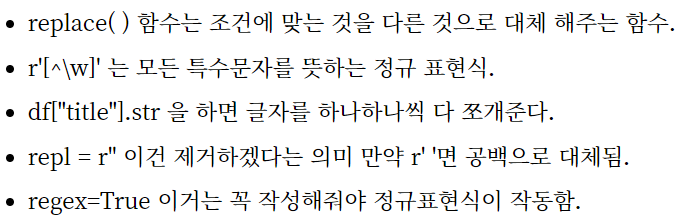

In [ ]:
data['article'] = data['article'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

- 한국어에서 불용어 제거하기
- https://wikidocs.net/22530

In [ ]:
f = open('/content/drive/MyDrive/동아리_스터디_대외활동/Solux/2학기/Solux_Honey_News/crawling/result_crawling/stopwords.txt', 'r')
stopwords = f.read().splitlines()
print(stopwords)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어'

In [ ]:
data['article'][1]

'  저번에 주셨는데 뭘 또 주냐   저번에 그거 제가 잘 쓰고 있는데 라고 말하는 노웅래 더불어민주당  의원의 목소리  돈봉투가  오가며  부스럭거리는 소리까지도 그대로 녹음돼 있다        한동훈 법무부 장관이 28일 오후 국회 본회의장에서  노 의원이 청탁을 받고 돈을 받는 현장이 고스란히 녹음된 녹음파일이 있다 며 노웅래 의원에 대한 체포 동의 요청 이유를 설명했다   지난 20여 년간 중요한 부정부패 수사 다수를 직접 담당해 왔지만  부정한 돈을 주고받는 현장이 이렇게 생생하게 녹음돼 있는 사건은 본 적이 없다 고도 했다       169석의 거야 巨野  더불어민주당은 하지만 몰표로 동료 의원에 대한  방탄 을 선택했다  이에 한 장관은  국민이 오늘 결정을 오래도록 기억하실 것 이라고 했다  안호영 민주당 수석대변인은  한 장관의 본분을 저버린 피의사실 공표와 자기정치는 오늘 노웅래 의원 체포동의안의 부결을 불러왔음을 똑똑히 알아야 할 것 이라고 책임을 돌렸다       뇌물 및 불법 정치자금 수수 의혹을 받는 노 의원의 체포동의안은 이날 재적 299인 가운데 총투표수 271표  찬성 101표  반대 161표  기권 9표로 부결됐다  21대 국회에서 체포동의안이 부결된 건 처음이다  앞서 정정순 이상직 정찬민 의원 체포안은 모두 가결됐다  본회의에 앞서 야당인 정의당 6석 은 찬성 입장을 밝힌 만큼  출석한 민주당 의원은 이탈 없이 반대표를 던졌을 것 이란 분석이 나온다       노 의원은 한 장관의 이유 설명에 이어 발언권을 얻어  방어권을 완전히 무시한 것이다  사람 죽이는 수사 라고 했다  그러면서  한마디로 검찰이 만든 작품 이라며  뇌물을 받은 것처럼 언론플레이해 재판도 받기 전에 저를 범법자로 만들었고  저는 만신창이가 됐다 고 동정론을 호소했고  결국 먹혔다       민주당은 공식적으론 반대 당론을 정하진 않았다고 했지만  본회의 직전 의원총회에선 박홍근 원내대표가 두둔 발언을 하고  검찰 독재 저지하자 를 외치며 피케팅을 진행했

In [ ]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
word_tokens = okt.morphs(data['article'][1])

In [ ]:
def apply_okt(data):
  okt = Okt()
  word_tokens = okt.morphs(data)
  result = [word for word in word_tokens if not word in stopwords]
  result = ' '.join(result)
  return result

In [ ]:
data['article'] = data['article'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [ ]:
result = [word for word in word_tokens if not word in stopwords]
result

In [ ]:
len(word_tokens), len(result)

(880, 695)

In [ ]:
' '.join(result)

In [ ]:
data['new_article'] = data['article'].apply(apply_okt)
data

,Unnamed: 0,title,article,news,new_article
0,0,윤 대통령 “북 무인기 한 대 왔으면 우린 2~3대 보내라”,윤석열 대통령이 28일 북한의 어떤 도발에도 확실하게 응징 보복하라 그것이 가...,중앙일보,윤석열 대통령 28일 북한 도발 에도 확실하게 응징 보복 라 그것 가장 강력한 수단...
1,1,"노웅래 체포안 부결...與 ""이재명 방탄 예고편""",저번에 주셨는데 뭘 또 주냐 저번에 그거 제가 잘 쓰고 있는데 라고 말하는 ...,중앙일보,저번 주셨는데 뭘 주냐 저번 그거 잘 쓰고 있는데 라고 말 하는 노웅래 민주당 의원...
2,2,이재명 때린 17년전 이재명? '지자체 부정부패' 논문 재조명,이재명 더불어민주당 대표가 성남FC 후원금 의혹과 관련해 검찰 수사를 받는 가운데 ...,중앙일보,이재명 민주당 대표 성남 FC 후 원금 의혹 관련 해 검찰 수사 받는 가운데 17년...
3,3,"[단독] TBS 직원 10명중 6명 ""김어준 방송, 중립적이지 않다""",정치적 편향 논란이 끊이지 않던 TBS 교통방송 라디오 프로그램 김어준의 뉴스공...,중앙일보,정치 적 편향 논란 끊이지 않던 TBS 교통 방송 라디오 프로그램 김어준 뉴스 공장...
4,4,미사일 안쏘고 韓 흔든 北…대박난 '회색지대 도발' 더 세진다,북한의 대남 도발이 날로 교묘해지고 있다 핵ㆍ미사일과 같은 고강도 도발에다 지난 ...,중앙일보,북한 대남 도발 날로 교묘해지고 핵 ㆍ 미사일 같은 고 강도 도발 에다 지난 26일...
...,...,...,...,...,...
395,95,43%가 ‘사표’…“소선거구제는 썩은 그릇에 국물 조금 붓는 것”,2020년 치러진 21대 총선에 참여한 유권자 2874만1408표 가운데 10명 ...,한겨레,2020년 치러진 21 대 총선 참여 한 유권자 2874만 1408 표 가운데 10...
396,96,윤 대통령 지지율 41.2%…2주 연속 상승 [리얼미터],윤석열 대통령의 국정 지지율이 2주 연속 상승해 41 대를 기록했다 리얼미터가 미...,한겨레,윤석열 대통령 국정 지지율 2 주 연속 상승 해 41 대를 기록 했다 리얼미터 미디...
397,97,"민주, ‘이재명 수사’ 검사 16명 공개…국힘 “헌법 질서에 도전”",더불어민주당이 이재명 대표와 관련한 수사를 진행 중인 검사들의 사진과 이름이 담긴 ...,한겨레,민주당 이재명 대표 관련 한 수사 진행 중인 검사 사진 이름 담긴 자료 만들어 전국...
398,98,노란봉투법·양곡관리법·차별금지법…여야 이견 속 해 넘길판,여야가 지난 24일 638조7천억원 규모의 내년도 예산안과 부수법안을 지각 처리...,한겨레,여야 지난 24일 638조 7천억원 규모 내년 도 예산안 부수 법안 지각 처리 했지...


In [ ]:
data.columns

Index(['Unnamed: 0', 'title', 'article', 'news', 'new_article'], dtype='object')

In [ ]:
new_data = data.drop(columns=['Unnamed: 0', 'article'])

In [44]:
new_data.to_csv('/content/drive/MyDrive/동아리_스터디_대외활동/Solux/2학기/Solux_Honey_News/crawling/result_crawling/preprocessed_data.csv', index=False)